In [1]:
import pandas as pd
import numpy as np
from numpy import asarray
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
encoder = OneHotEncoder(handle_unknown='ignore')

In [6]:
sex_df = pd.DataFrame(encoder.fit_transform(df[['Sex']]).toarray())
sex_name = ["Female", "Male"]
sex_df.columns = sex_name
print(sex_df.shape)
sex_df.head()

(319795, 2)


,Female,Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [7]:
def one_hot_encode(x:np.ndarray):
    uni = np.unique(x)
    print(uni)
    result = np.zeros((len(x), len(uni)))
    for i in range(len(x)):
        for j in range(len(uni)):
            if x[i] == uni[j]:
                result[i][j] = 1;
                
    return result

In [8]:
race_arr = pd.DataFrame(df['Race']).to_numpy()
one_hot_race = one_hot_encode(race_arr)
race_df = pd.DataFrame(one_hot_race, columns = ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other',
 'White'])
race_df.head()

['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']


,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
diabetic_arr = pd.DataFrame(df['Diabetic']).to_numpy()
one_hot_diabetic = one_hot_encode(diabetic_arr)
diabetic_df = pd.DataFrame(one_hot_diabetic, columns = ['Diabetic(No)', 'Diabetic(No, borderline diabetes)', 'Diabetic(Yes)', 'Diabetic(Yes, during pregnancy)'])
diabetic_df.head()

['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']


,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)"
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


In [10]:
gen_health_arr = pd.DataFrame(df['GenHealth']).to_numpy()
one_hot_gen_health = one_hot_encode(gen_health_arr)
gen_health_df = pd.DataFrame(one_hot_gen_health, columns = ['GenHealth(Excellent)', 'GenHealth(Fair)', 
                                                            'GenHealth(Good)', 'GenHealth(Poor)', 'GenHealth(Very good)'])
gen_health_df.head()

['Excellent' 'Fair' 'Good' 'Poor' 'Very good']


,GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [11]:
df = df.drop(['Sex', 'Race', 'GenHealth', 'Diabetic', 'AgeCategory', 'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], axis=1)
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Yes,Yes,No,Yes
1,No,No,No,Yes,No,Yes,No,No,No
2,No,Yes,No,No,No,Yes,Yes,No,No
3,No,No,No,No,No,No,No,No,Yes
4,No,No,No,No,Yes,Yes,No,No,No


In [12]:
df['Smoking'] = df['Smoking'].map(
                   {'Yes':1 ,'No':0})
df['HeartDisease'] = df['HeartDisease'].map(
                   {'Yes':1 ,'No':0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].map(
                   {'Yes':1 ,'No':0})
df['Stroke'] = df['Stroke'].map(
                   {'Yes':1 ,'No':0})
df['DiffWalking'] = df['DiffWalking'].map(
                   {'Yes':1 ,'No':0})
df['PhysicalActivity'] = df['PhysicalActivity'].map(
                   {'Yes':1 ,'No':0})
df['Asthma'] = df['Asthma'].map(
                   {'Yes':1 ,'No':0})
df['KidneyDisease'] = df['KidneyDisease'].map(
                   {'Yes':1 ,'No':0})
df['SkinCancer'] = df['SkinCancer'].map(
                   {'Yes':1 ,'No':0})
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,1,1,0,1
1,0,0,0,1,0,1,0,0,0
2,0,1,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,1,0,0,0


In [13]:
df = pd.concat([df, sex_df], axis=1, join='inner')
df = pd.concat([df, race_df], axis=1, join='inner')
df = pd.concat([df, diabetic_df], axis=1, join='inner')
df = pd.concat([df, gen_health_df], axis=1, join='inner')
df.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,...,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,0,1,0,0,0,1,1,0,1,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,1,0,1,0,0,0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,0,0,0,1,1,0,0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,1,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,1,1,0,0,0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Normalization starts here:

In [14]:
# read file
original_df = pd.read_csv('heart_2020_cleaned.csv')
original_df.shape

(319795, 18)

In [15]:
# take a look at the dataset
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Processing numeric features

In [16]:
# age feature
original_df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [17]:
#replace the range with the first number
original_df['AgeCategory'] = original_df['AgeCategory'].replace(['80 or older'],'80-')
original_df['AgeCategory'] = original_df['AgeCategory'].str.split('-').str[0].astype('float64')

In [18]:
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55.0,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80.0,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65.0,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75.0,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40.0,White,No,Yes,Very good,8.0,No,No,No


In [19]:
# process numeric features: BMI, PhysicalHealth, MentalHealth, AgeCategory, SleepTime
numeric_features = ['BMI','PhysicalHealth','MentalHealth','AgeCategory','SleepTime']
scaler = StandardScaler()
original_df[numeric_features] = scaler.fit_transform(original_df[numeric_features])

In [20]:
original_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,-1.844750,Yes,No,No,-0.046751,3.281069,No,Female,0.141621,White,Yes,Yes,Very good,-1.460354,Yes,No,Yes
1,No,-1.256338,No,No,Yes,-0.424070,-0.490039,No,Female,1.525151,White,No,Yes,Very good,-0.067601,No,No,No
2,No,-0.274603,Yes,No,No,2.091388,3.281069,No,Male,0.695033,White,Yes,Yes,Fair,0.628776,Yes,No,No
3,No,-0.647473,No,No,No,-0.424070,-0.490039,No,Female,1.248445,White,No,No,Good,-0.763977,No,No,Yes
4,No,-0.726138,No,No,No,3.097572,-0.490039,Yes,Female,-0.688497,White,No,Yes,Very good,0.628776,No,No,No


In [21]:
original_df = original_df.drop(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 
                                'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)

In [22]:
original_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601
2,-0.274603,2.091388,3.281069,0.695033,0.628776
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776


In [23]:
original_df = pd.concat([original_df, df], axis=1, join='inner')

# Dataframe after cleaning:

In [24]:
result_df = original_df
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,...,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
pd.set_option('display.max_columns', None)
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),"Diabetic(No, borderline diabetes)",Diabetic(Yes),"Diabetic(Yes, during pregnancy)",GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
result_df = result_df.drop(['Diabetic(No, borderline diabetes)', 'Diabetic(Yes, during pregnancy)'], axis=1)
result_df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),Diabetic(Yes),GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
result_df.isnull().sum()

BMI                               0
PhysicalHealth                    0
MentalHealth                      0
AgeCategory                       0
SleepTime                         0
HeartDisease                      0
Smoking                           0
AlcoholDrinking                   0
Stroke                            0
DiffWalking                       0
PhysicalActivity                  0
Asthma                            0
KidneyDisease                     0
SkinCancer                        0
Female                            0
Male                              0
American Indian/Alaskan Native    0
Asian                             0
Black                             0
Hispanic                          0
Other                             0
White                             0
Diabetic(No)                      0
Diabetic(Yes)                     0
GenHealth(Excellent)              0
GenHealth(Fair)                   0
GenHealth(Good)                   0
GenHealth(Poor)             

# Correlation

<AxesSubplot:>

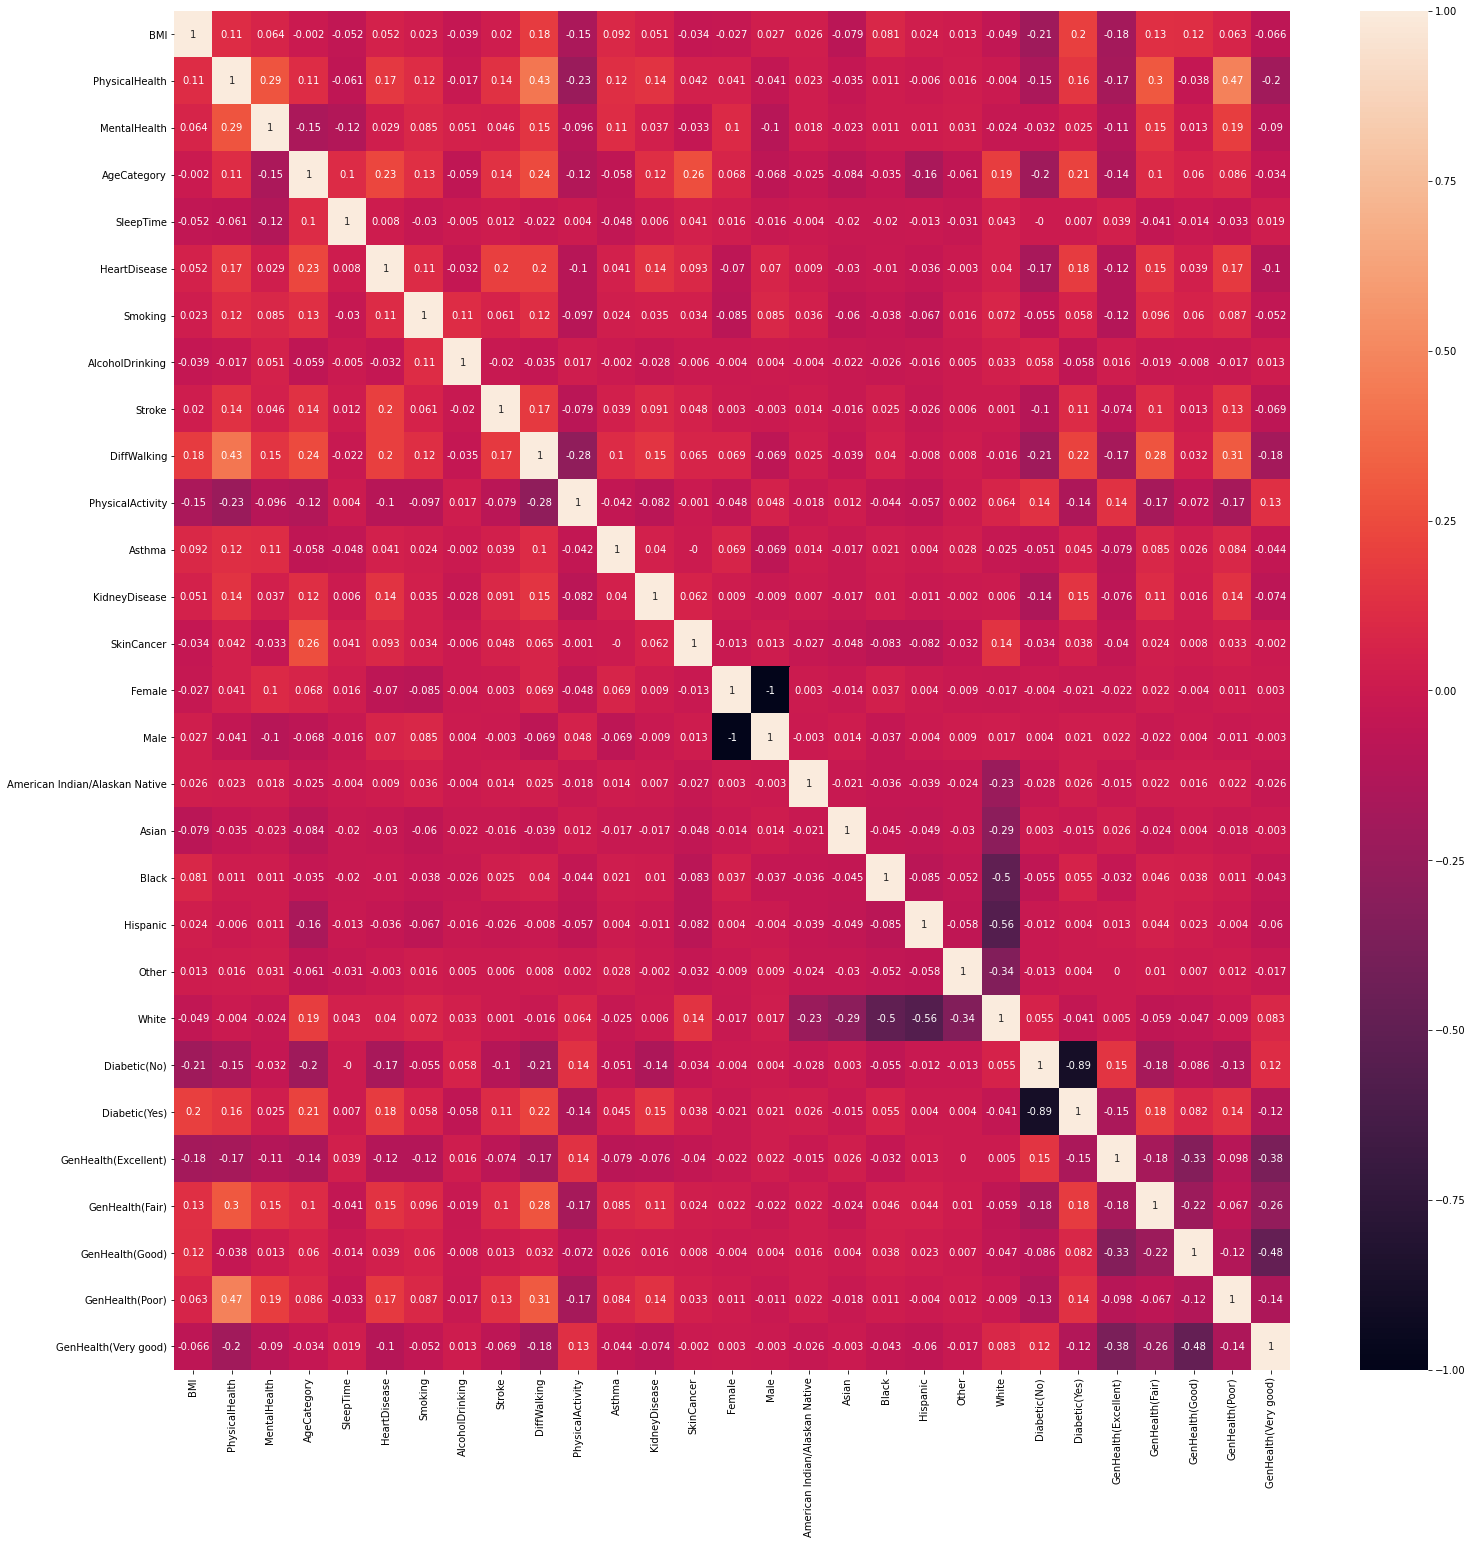

In [28]:
correlation = result_df.corr().round(3)
plt.figure(figsize = (25,25))
sns.heatmap(correlation, annot = True, cmap = 'rocket')

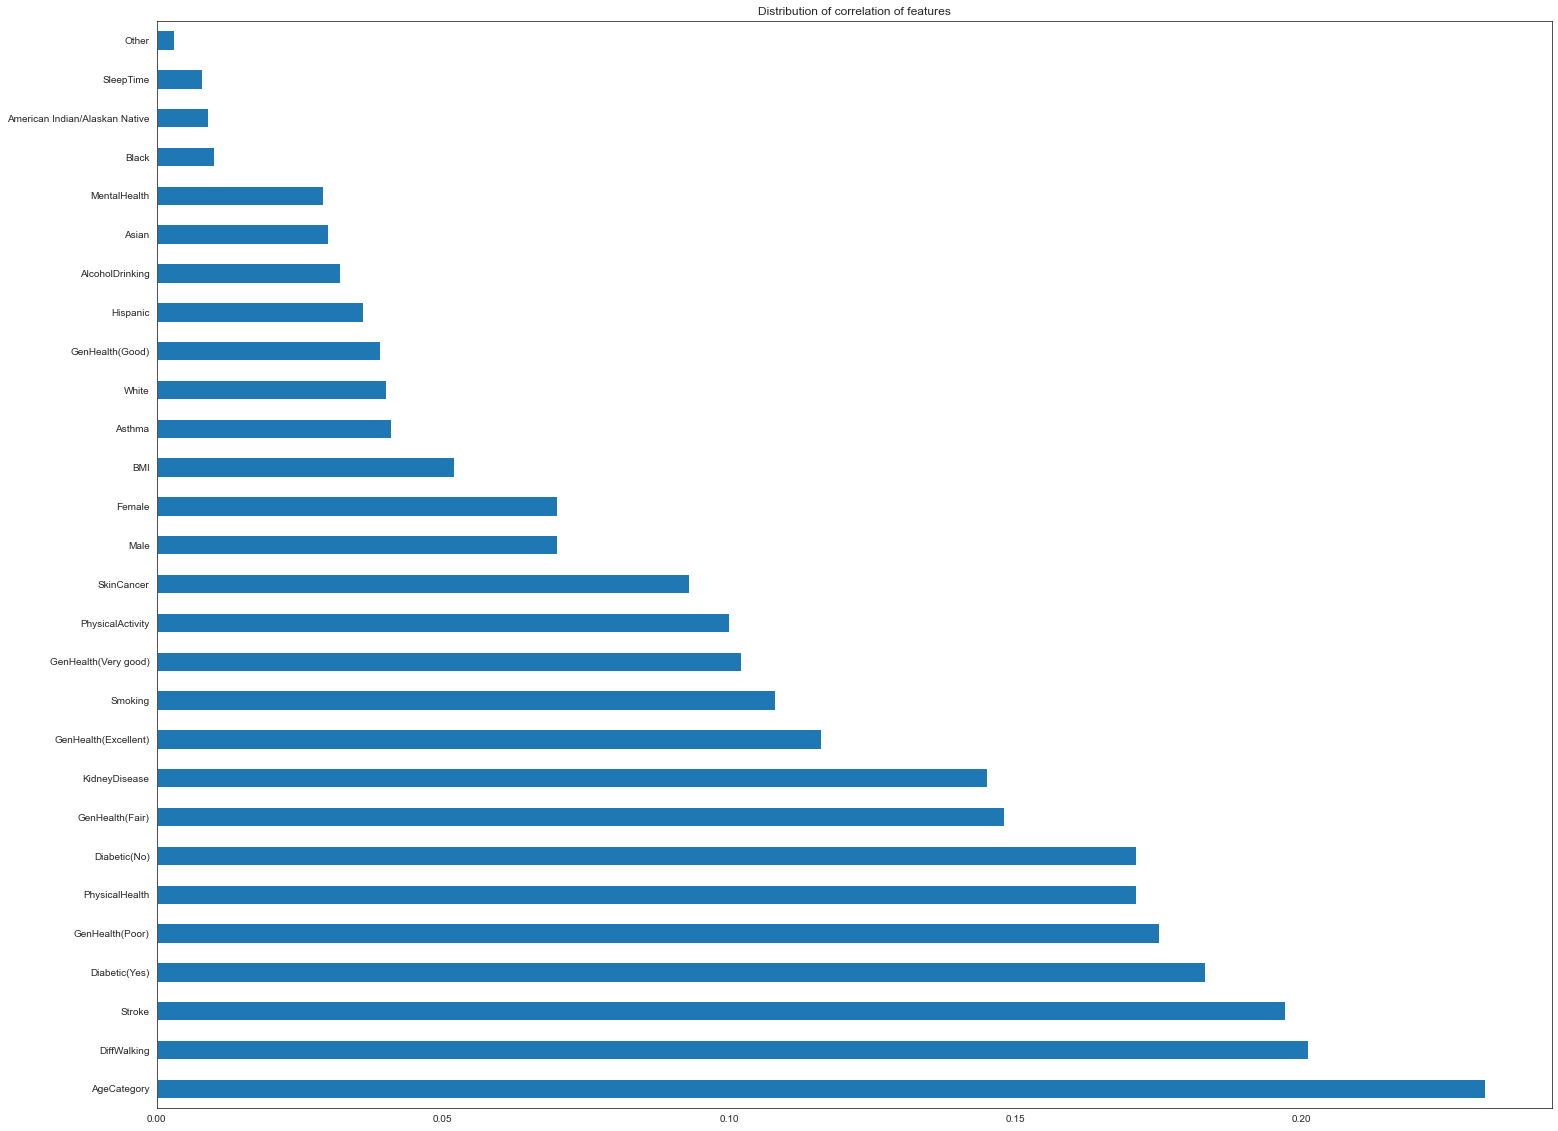

,HeartDisease
AgeCategory,0.232
DiffWalking,0.201
Stroke,0.197
Diabetic(Yes),0.183
GenHealth(Poor),0.175
PhysicalHealth,0.171
Diabetic(No),0.171
GenHealth(Fair),0.148
KidneyDisease,0.145
GenHealth(Excellent),0.116


In [29]:
corr_result = pd.DataFrame(correlation.loc["HeartDisease"])
corr_result = abs(corr_result.drop(["HeartDisease"]))
corr_result = corr_result.sort_values("HeartDisease", ascending = False)
sns.set_style('white')
sns.set_palette('tab10')
plt.figure(figsize = (25,20))
plt.title('Distribution of correlation of features')
abs(corr_result['HeartDisease']).plot.barh()
plt.show()
corr_result

<AxesSubplot:>

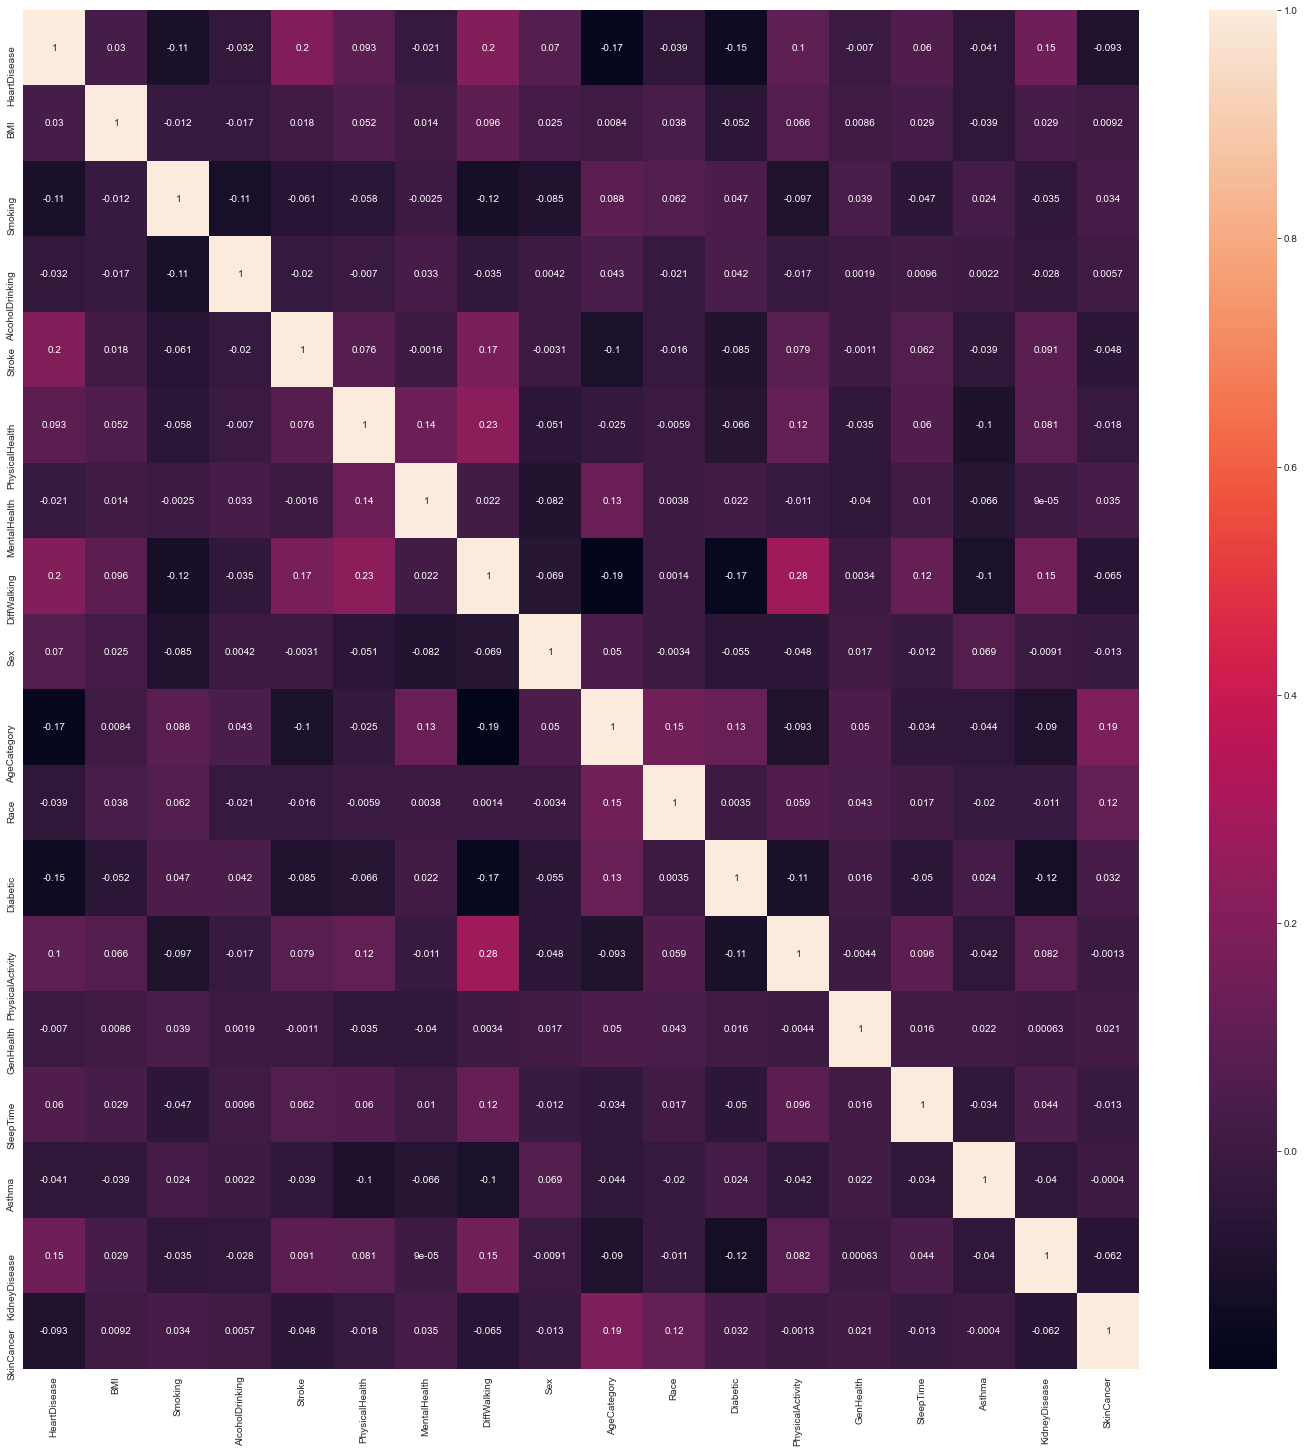

In [30]:
df = pd.read_csv('heart_2020_cleaned.csv')
correlation = df.apply(lambda x: x.factorize()[0]).corr()
plt.figure(figsize = (25,25))
sns.heatmap(correlation, annot = True, cmap = 'rocket')

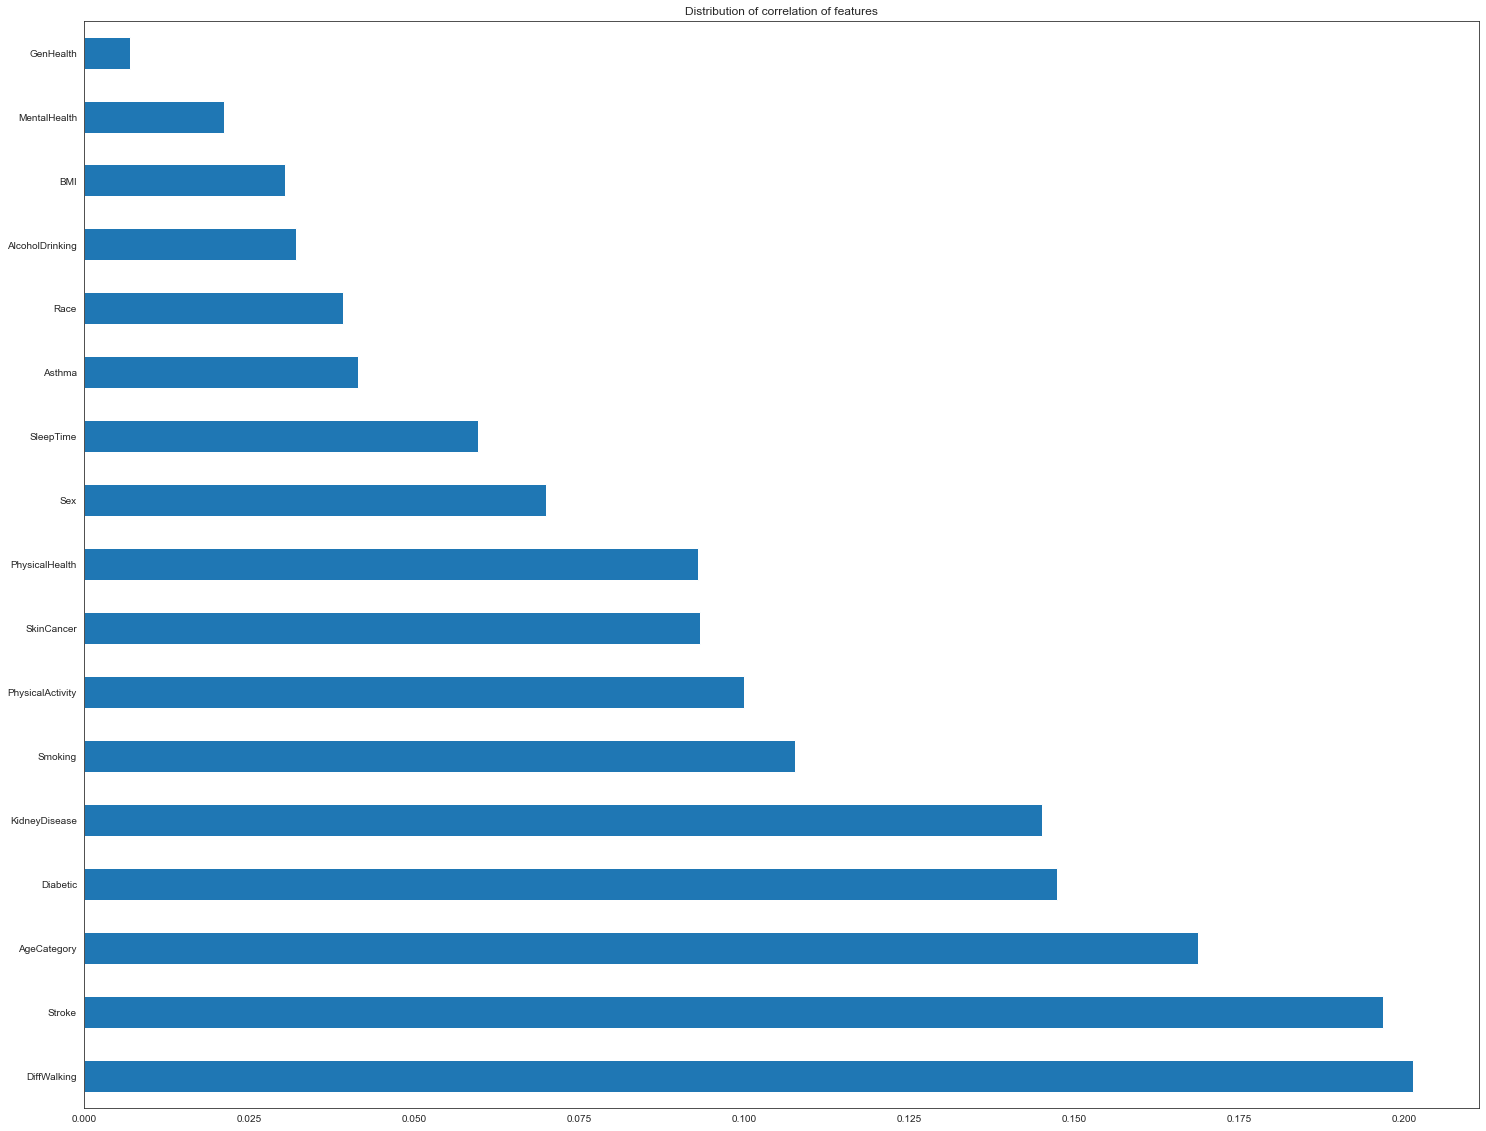

,HeartDisease
DiffWalking,0.201258
Stroke,0.196835
AgeCategory,0.168821
Diabetic,0.147366
KidneyDisease,0.145197
Smoking,0.107764
PhysicalActivity,0.100030
SkinCancer,0.093317
PhysicalHealth,0.093051
Sex,0.070040


In [31]:
corr_result = pd.DataFrame(correlation.loc["HeartDisease"])
corr_result = abs(corr_result.drop(["HeartDisease"]))
corr_result = corr_result.sort_values("HeartDisease", ascending = False)
sns.set_style('white')
sns.set_palette('tab10')
plt.figure(figsize = (25,20))
plt.title('Distribution of correlation of features')
abs(corr_result['HeartDisease']).plot.barh()
plt.show()
corr_result

# EDA

## The relationship between HeartDisease and AgeCategory

In [32]:
age_heart = pd.DataFrame(df[['HeartDisease', 'AgeCategory']])
age_heart['HeartDisease'] = age_heart['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)
age_heart

,HeartDisease,AgeCategory
0,0,55-59
1,0,80 or older
2,0,65-69
3,0,75-79
4,0,40-44
...,...,...
319790,1,60-64
319791,0,35-39
319792,0,45-49
319793,0,25-29


An overview of the whole dataset

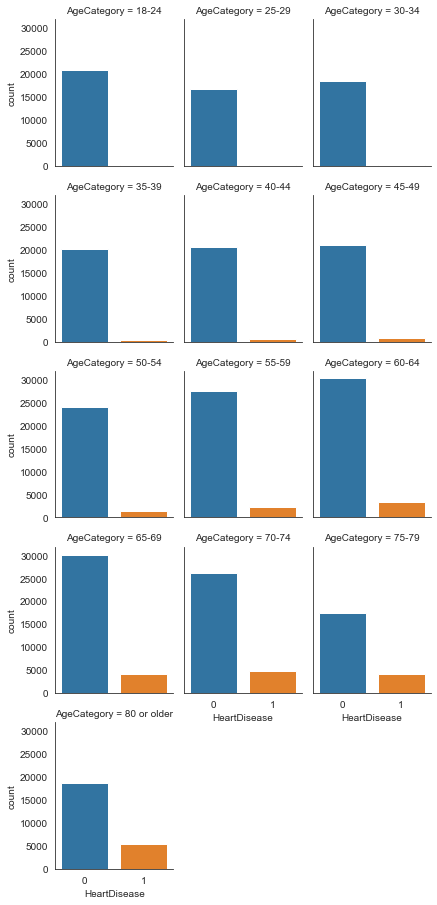

In [33]:
sns.catplot(x="HeartDisease", col="AgeCategory", col_order=[i for i,j in age_heart.groupby('AgeCategory')], data=age_heart, kind="count", col_wrap=3, height=2.5, aspect=.8,margin_titles=True)
plt.show()

Randomly choose 10000 people from each category

In [34]:
random_10000_eachage = pd.DataFrame(columns = ['HeartDisease', 'AgeCategory'])
for i, j in age_heart.groupby('AgeCategory'):
    random_10000_eachage = pd.concat([j.sample(n = 10000, replace = False),random_10000_eachage])
random_10000_eachage.head()

,HeartDisease,AgeCategory
221146,0,80 or older
235387,0,80 or older
116964,0,80 or older
82617,1,80 or older
261554,0,80 or older


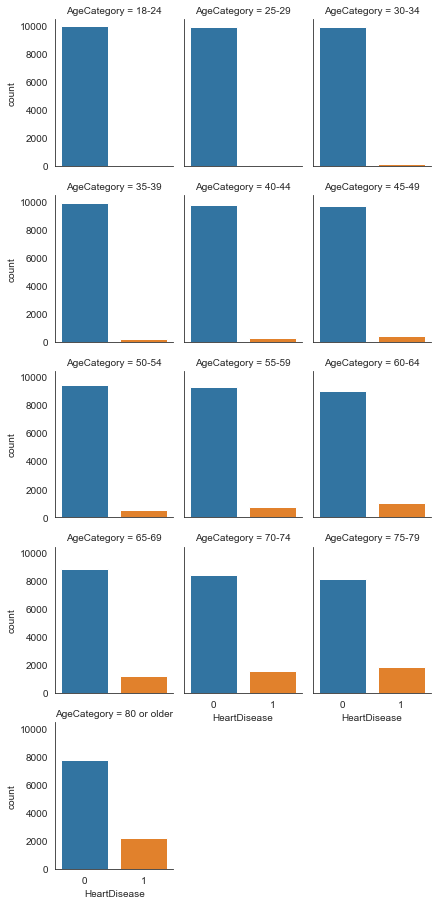

In [35]:
sns.catplot(x="HeartDisease", col="AgeCategory", col_order=[i for i,j in age_heart.groupby('AgeCategory')], data=random_10000_eachage, kind="count", col_wrap=3, height=2.5, aspect=.8, margin_titles=True)
plt.show()

From the graph, we could see that when age is higher, there are more people have heart disease.

Draw the percentage of people who have heartdisease using pie chart

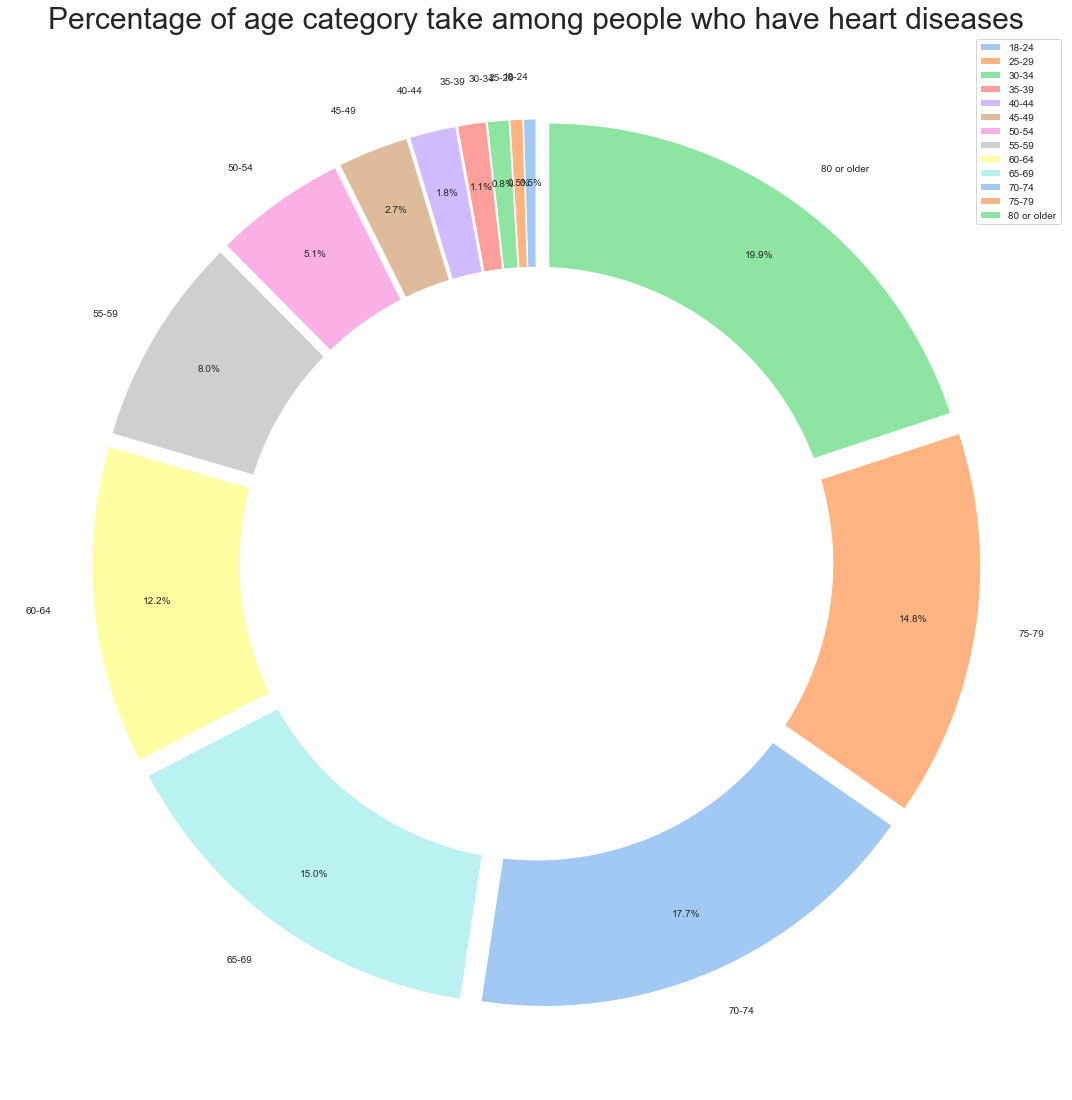

In [36]:
label = []
count = []
for i, j in age_heart.groupby('AgeCategory'):
    label.append(i)
    count.append(sum(j['HeartDisease']))
fig = plt.figure(figsize=(15, 15))
colors = sns.color_palette('pastel')[0:13]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(count, labels = label, colors=colors,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.legend()
plt.title("Percentage of age category take among people who have heart diseases",fontsize=30)
plt.show()

Investigate the relaionship between BMI and positivity of heartdisease

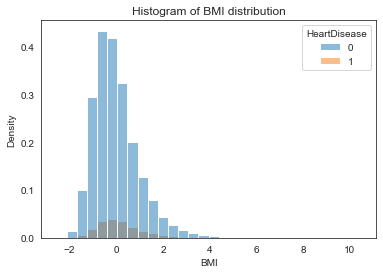

In [37]:
sns.histplot(data=result_df, x="BMI", hue="HeartDisease", bins=30, stat="density").set(title='Histogram of BMI distribution')
plt.show()

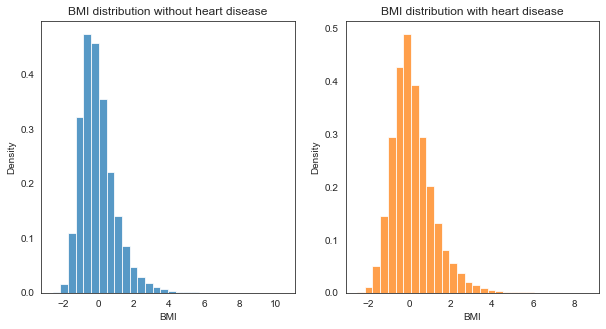

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax=axes[0], data=result_df[result_df['HeartDisease'] == 0], x="BMI", bins=30, stat="density").set(title='BMI distribution without heart disease')
sns.histplot(ax=axes[1], data=result_df[result_df['HeartDisease'] == 1], x="BMI", bins=30, stat="density", color = sns.color_palette()[1]).set(title='BMI distribution with heart disease')
plt.show()

It seems that people with heart disease and people without heart disease have similar distribution of BMI.

Investigate the Physicalhealth, mentalhealth on heart disease

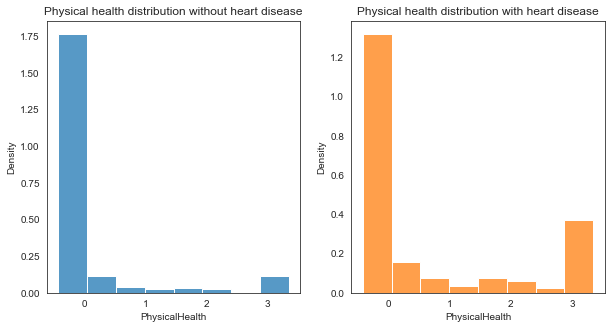

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax=axes[0], data=result_df[result_df['HeartDisease'] == 0], x="PhysicalHealth", bins=8, stat="density").set(title='Physical health distribution without heart disease')
sns.histplot(ax=axes[1], data=result_df[result_df['HeartDisease'] == 1], x="PhysicalHealth", bins=8, stat="density", color = sns.color_palette()[1]).set(title='Physical health distribution with heart disease')
plt.show()

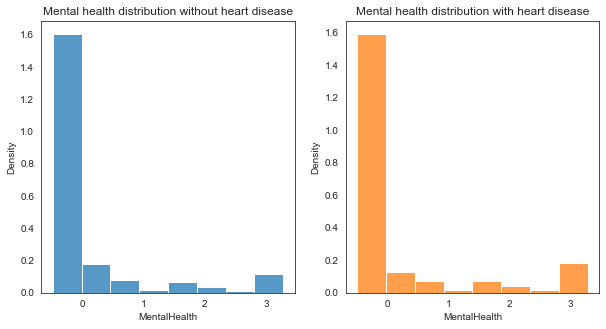

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax=axes[0], data=result_df[result_df['HeartDisease'] == 0], x="MentalHealth", bins=8, stat="density").set(title='Mental health distribution without heart disease')
sns.histplot(ax=axes[1], data=result_df[result_df['HeartDisease'] == 1], x="MentalHealth", bins=8, stat="density", color = sns.color_palette()[1]).set(title='Mental health distribution with heart disease')
plt.show()

From above graphs, people with/without heart disease have a similar distribution on mental and physical health, the only difference is that there is larger proportion of high physical health component in people with heart disease.

Investigate the relationship between sleeptime and positivity of heart disease

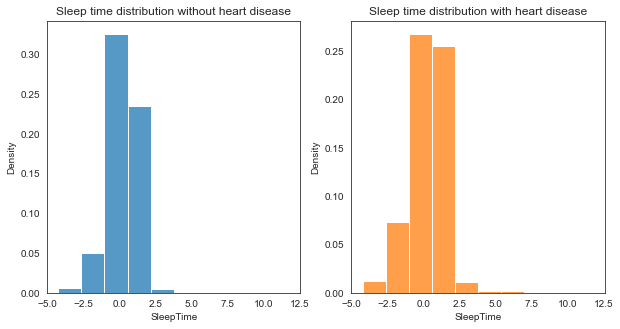

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(ax=axes[0], data=result_df[result_df['HeartDisease'] == 0], x="SleepTime", bins=10, stat="density").set(title='Sleep time distribution without heart disease')
sns.histplot(ax=axes[1], data=result_df[result_df['HeartDisease'] == 1], x="SleepTime", bins=10, stat="density", color = sns.color_palette()[1]).set(title='Sleep time distribution with heart disease')
plt.show()

From the above graphs, there is a higher proportion of people sleep 0 hours (after standardization) for people who do not have heart disease. There is a lower proportion of people sleep more than 2.5 hours (after standardization) for people who do not have heart disease.

Investigate the relationship between bad habits and positivity of heart disease.

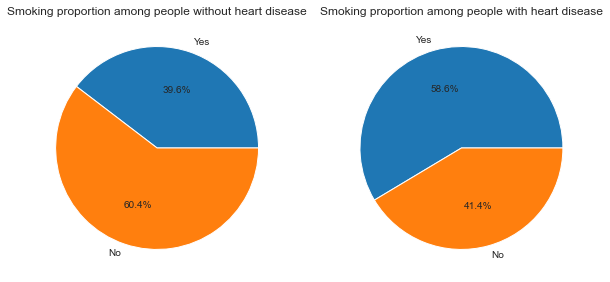

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
label = ['Yes', 'No']
negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
axes[0].pie([negative_heartdisease['Smoking'].sum(), len(negative_heartdisease['Smoking']) - negative_heartdisease['Smoking'].sum()], autopct='%1.1f%%', labels = label)
axes[0].set_title('Smoking proportion among people without heart disease')
axes[1].pie([positive_heartdisease['Smoking'].sum(), len(positive_heartdisease['Smoking']) - positive_heartdisease['Smoking'].sum()], autopct='%1.1f%%', labels = label)
axes[1].set_title('Smoking proportion among people with heart disease')
plt.show()

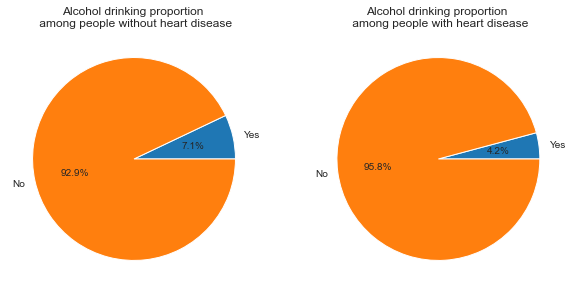

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
label = ['Yes', 'No']
negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
axes[0].pie([negative_heartdisease['AlcoholDrinking'].sum(), len(negative_heartdisease['AlcoholDrinking']) - negative_heartdisease['AlcoholDrinking'].sum()], autopct='%1.1f%%', labels = label)
axes[0].set_title('Alcohol drinking proportion \n among people without heart disease')
axes[1].pie([positive_heartdisease['AlcoholDrinking'].sum(), len(positive_heartdisease['AlcoholDrinking']) - positive_heartdisease['AlcoholDrinking'].sum()], autopct='%1.1f%%', labels = label)
axes[1].set_title('Alcohol drinking proportion \n among people with heart disease')
plt.show()

Among people who do not have heart disease, there are less proportion smoking and more proportion drinking alcohol, compared with people who have heart disease.

Investigate the relationship between physical activity, difficulty walking and positivity of heart disease

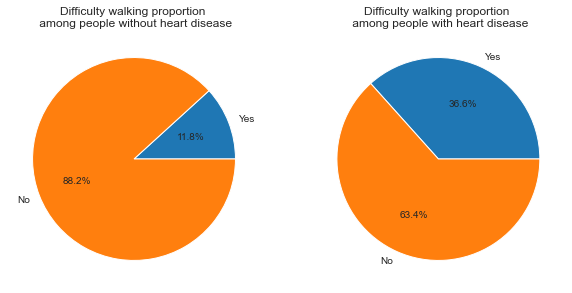

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
label = ['Yes', 'No']
negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
axes[0].pie([negative_heartdisease['DiffWalking'].sum(), len(negative_heartdisease['DiffWalking']) - negative_heartdisease['DiffWalking'].sum()], autopct='%1.1f%%', labels = label)
axes[0].set_title('Difficulty walking proportion \n among people without heart disease')
axes[1].pie([positive_heartdisease['DiffWalking'].sum(), len(positive_heartdisease['DiffWalking']) - positive_heartdisease['DiffWalking'].sum()], autopct='%1.1f%%', labels = label)
axes[1].set_title('Difficulty walking proportion \n among people with heart disease')
plt.show()

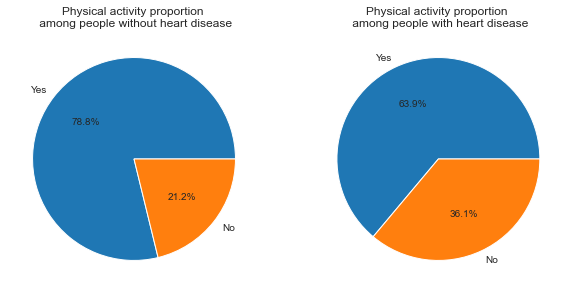

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
label = ['Yes', 'No']
negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
axes[0].pie([negative_heartdisease['PhysicalActivity'].sum(), len(negative_heartdisease['PhysicalActivity']) - negative_heartdisease['PhysicalActivity'].sum()], autopct='%1.1f%%', labels = label)
axes[0].set_title('Physical activity proportion \n among people without heart disease')
axes[1].pie([positive_heartdisease['PhysicalActivity'].sum(), len(positive_heartdisease['PhysicalActivity']) - positive_heartdisease['PhysicalActivity'].sum()], autopct='%1.1f%%', labels = label)
axes[1].set_title('Physical activity proportion \n among people with heart disease')
plt.show()

In general, there are more people having difficulty walking, and had no physical activity during last 30 days among people who have heart disease, compared with people who have no heart disease.

Investigate the relationship between fundamental diseases and heart disease

In [46]:
result_df

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),Diabetic(Yes),GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.144019,0.456341,-0.490039,0.418327,-0.763977,1,1,0,0,1,0,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
319791,0.238291,-0.424070,-0.490039,-0.965203,-1.460354,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
319792,-0.642753,-0.424070,-0.490039,-0.411791,-0.763977,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
319793,0.705560,-0.424070,-0.490039,-1.518615,3.414282,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


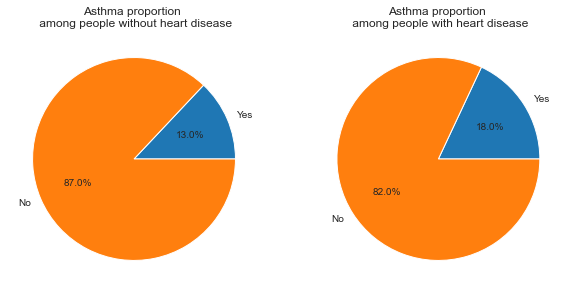

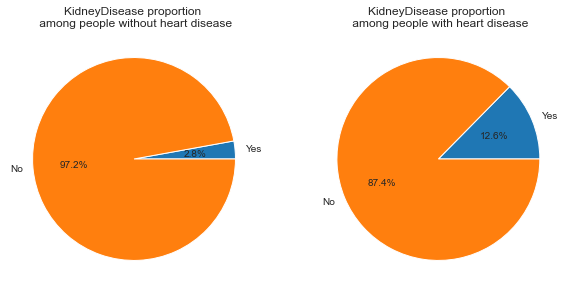

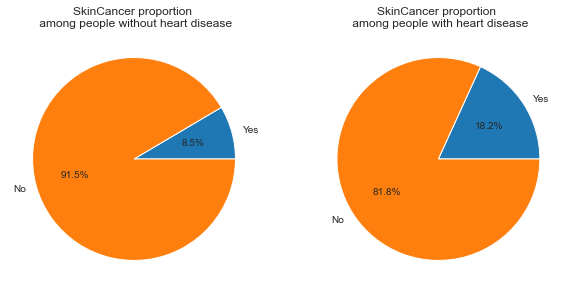

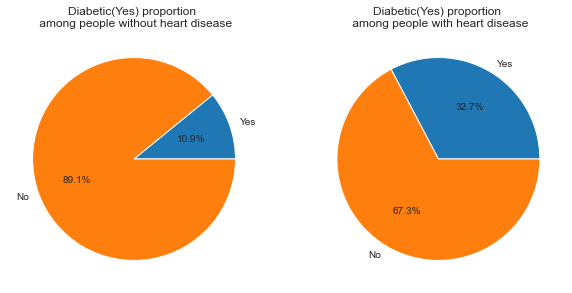

In [47]:
for i in ['Asthma','KidneyDisease','SkinCancer','Diabetic(Yes)']:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    label = ['Yes', 'No']
    negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
    positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
    axes[0].pie([negative_heartdisease[i].sum(), len(negative_heartdisease[i]) - negative_heartdisease[i].sum()], autopct='%1.1f%%', labels = label)
    axes[0].set_title(i + ' proportion \n among people without heart disease')
    axes[1].pie([positive_heartdisease[i].sum(), len(positive_heartdisease[i]) - positive_heartdisease[i].sum()], autopct='%1.1f%%', labels = label)
    axes[1].set_title(i + ' proportion \n among people with heart disease')
    plt.show()

Clearly from the above graphs, there is a higher proportion of having fundamental diseases among people who have heart disease, compared with people who do not have heart disease.

Investigate the relationship between gender and heart disease

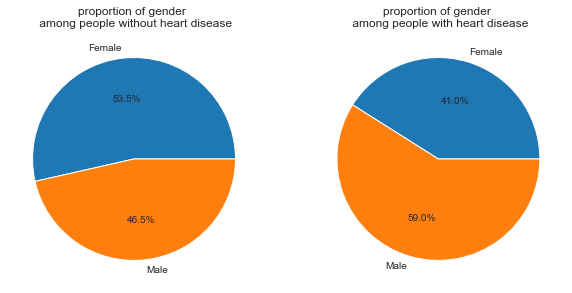

In [48]:
for i in ['Female']:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    label = ['Female', 'Male']
    negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
    positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
    axes[0].pie([negative_heartdisease[i].sum(), len(negative_heartdisease[i]) - negative_heartdisease[i].sum()], autopct='%1.1f%%', labels = label)
    axes[0].set_title('proportion of gender \n among people without heart disease')
    axes[1].pie([positive_heartdisease[i].sum(), len(positive_heartdisease[i]) - positive_heartdisease[i].sum()], autopct='%1.1f%%', labels = label)
    axes[1].set_title('proportion of gender \n among people with heart disease')
    plt.show()

From the grpah, female has a higher proportion in the people without heart disease.

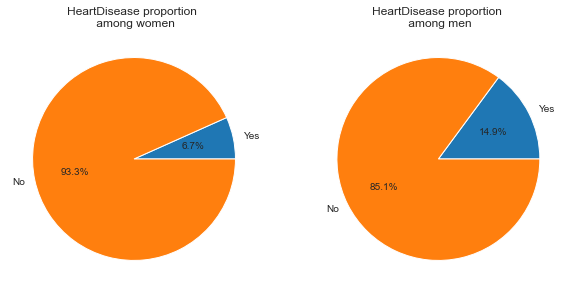

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
label = ['Yes', 'No']
positive_female = result_df[result_df['Female'] == 1]
positive_male = result_df[result_df['Male'] == 0]
axes[0].pie([positive_female['HeartDisease'].sum(), len(positive_female['HeartDisease']) - positive_female['HeartDisease'].sum()], autopct='%1.1f%%', labels = label)
axes[0].set_title('HeartDisease' + ' proportion \n among women')
axes[1].pie([positive_heartdisease['HeartDisease'].sum(), len(positive_male['HeartDisease']) - positive_male['HeartDisease'].sum()], autopct='%1.1f%%', labels = label)
axes[1].set_title('HeartDisease' + ' proportion \n among men')
plt.show()

From the graph, more proportion of men have heart disease compared with women.

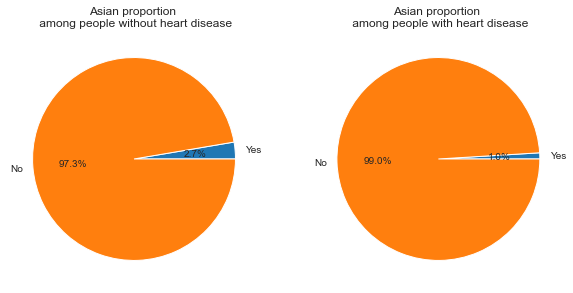

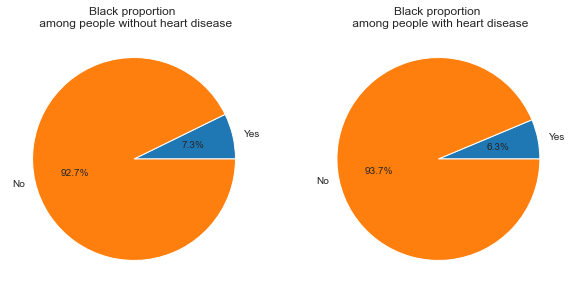

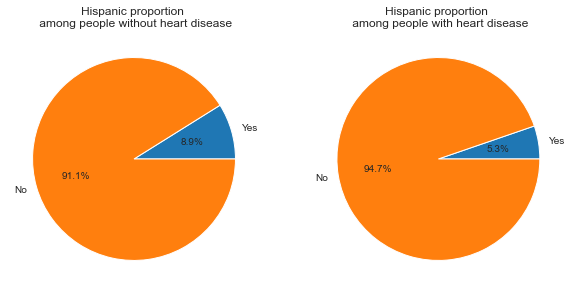

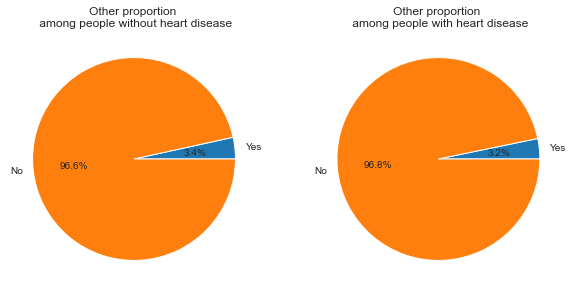

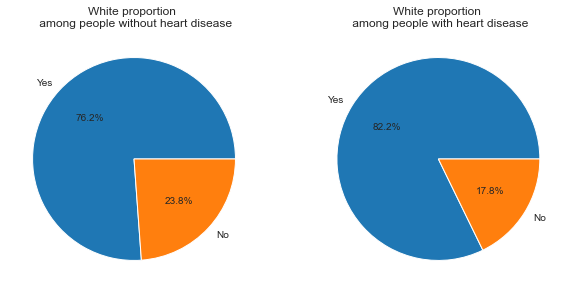

In [50]:
for i in ['Asian','Black','Hispanic', 'Other', 'White']:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    label = ['Yes', 'No']
    negative_heartdisease = result_df[result_df['HeartDisease'] == 0]
    positive_heartdisease = result_df[result_df['HeartDisease'] == 1]
    axes[0].pie([negative_heartdisease[i].sum(), len(negative_heartdisease[i]) - negative_heartdisease[i].sum()], autopct='%1.1f%%', labels = label)
    axes[0].set_title(i + ' proportion \n among people without heart disease')
    axes[1].pie([positive_heartdisease[i].sum(), len(positive_heartdisease[i]) - positive_heartdisease[i].sum()], autopct='%1.1f%%', labels = label)
    axes[1].set_title(i + ' proportion \n among people with heart disease')
    plt.show()

From above graphs, the distribution of gender seems to be the same among people who have heart disease and people who do not have heart disease.

In [51]:
result_df

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,Female,Male,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White,Diabetic(No),Diabetic(Yes),GenHealth(Excellent),GenHealth(Fair),GenHealth(Good),GenHealth(Poor),GenHealth(Very good)
0,-1.844750,-0.046751,3.281069,0.141621,-1.460354,0,1,0,0,0,1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.256338,-0.424070,-0.490039,1.525151,-0.067601,0,0,0,1,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.274603,2.091388,3.281069,0.695033,0.628776,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.647473,-0.424070,-0.490039,1.248445,-0.763977,0,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.726138,3.097572,-0.490039,-0.688497,0.628776,0,0,0,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,-0.144019,0.456341,-0.490039,0.418327,-0.763977,1,1,0,0,1,0,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
319791,0.238291,-0.424070,-0.490039,-0.965203,-1.460354,0,1,0,0,0,1,1,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
319792,-0.642753,-0.424070,-0.490039,-0.411791,-0.763977,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
319793,0.705560,-0.424070,-0.490039,-1.518615,3.414282,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Investigation of relationship between genhealth

In [52]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


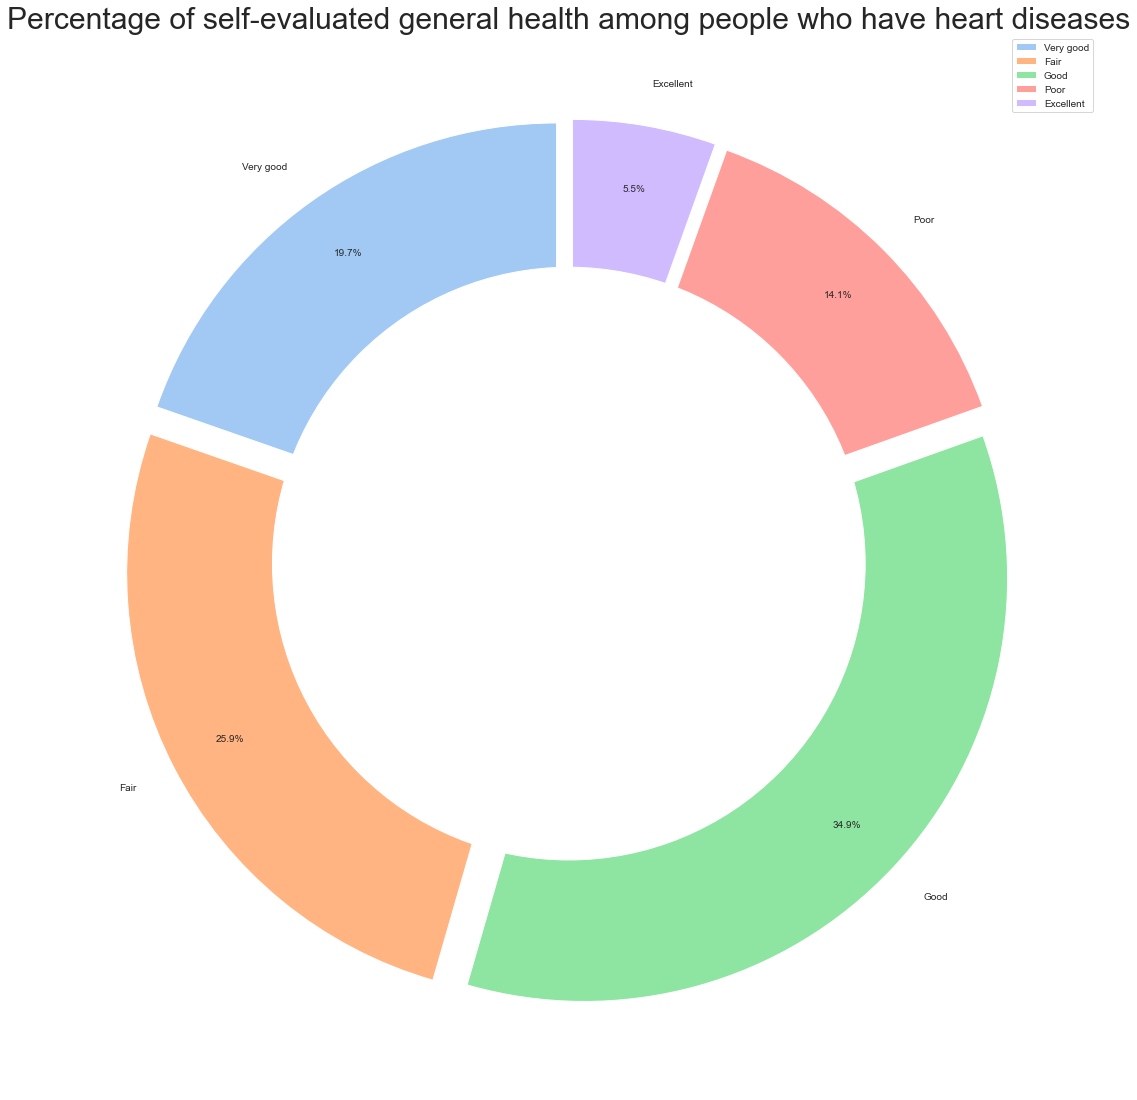

In [53]:
counts = []
label = []
for i in df['GenHealth'].unique():
    counts.append((df[df['HeartDisease'] == 'Yes']['GenHealth'] == i).sum())
    label.append(i)
fig = plt.figure(figsize=(15, 15))
colors = sns.color_palette('pastel')[0:13]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(counts, labels = label, colors=colors,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.legend()
plt.title("Percentage of self-evaluated general health among people who have heart diseases",fontsize=30)
plt.show()

Among those who have heart disease, fewer of them evaluate their health condition as "very good", and most of them evaluate themselves as "fair" and "good".

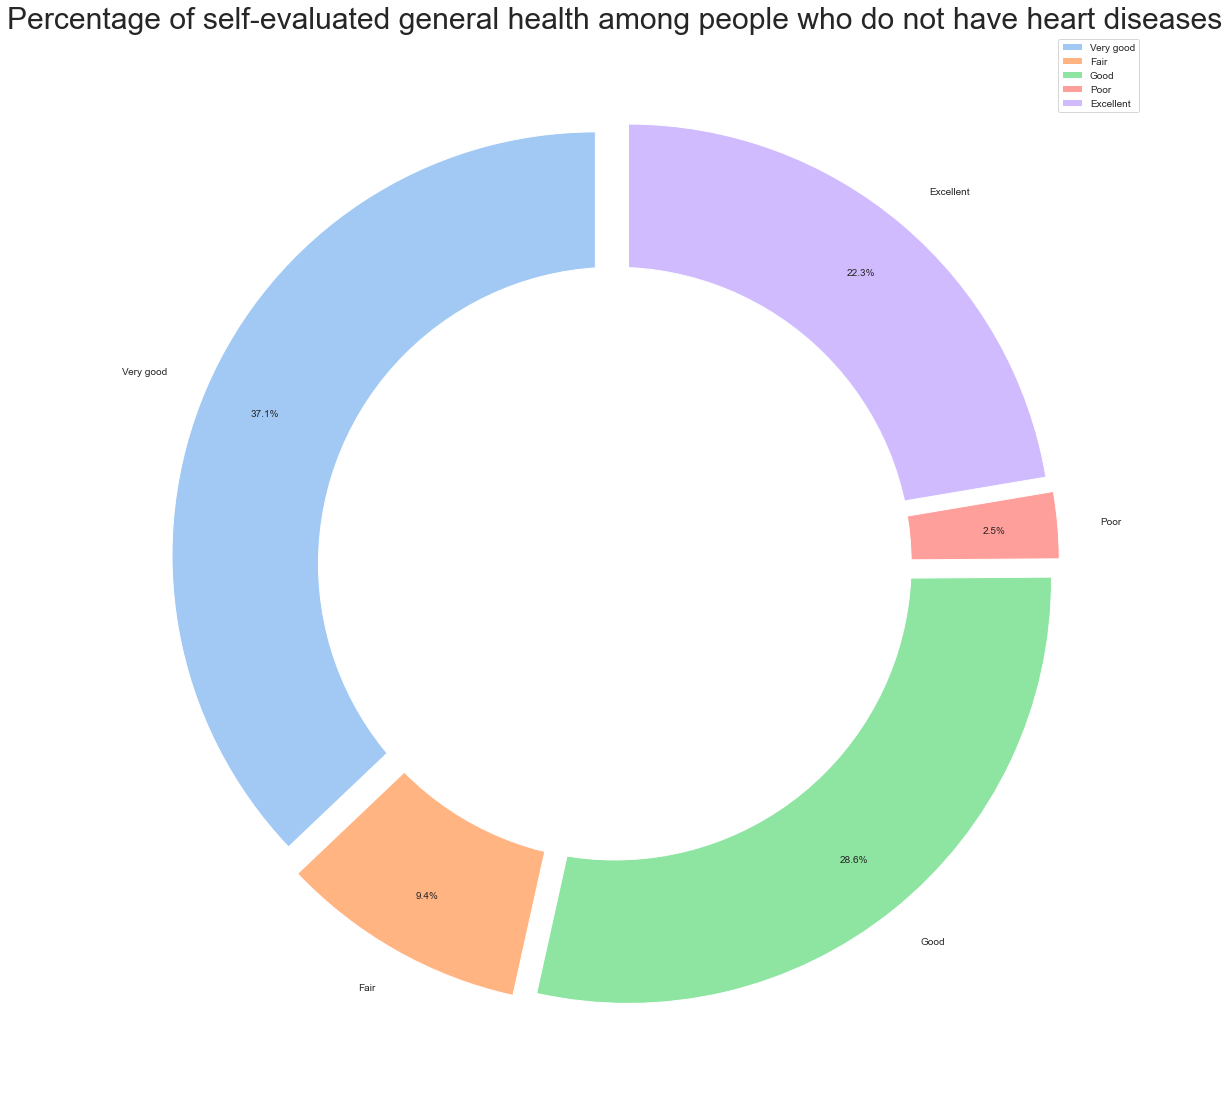

In [54]:
counts = []
label = []
for i in df['GenHealth'].unique():
    counts.append((df[df['HeartDisease'] == 'No']['GenHealth'] == i).sum())
    label.append(i)
fig = plt.figure(figsize=(15, 15))
colors = sns.color_palette('pastel')[0:13]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(counts, labels = label, colors=colors,autopct='%1.1f%%',startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.legend()
plt.title("Percentage of self-evaluated general health among people who do not have heart diseases",fontsize=30)
plt.show()

Among those who do not have heart diseases, more proportion of them mark themselves as "very good" and "excellent".

In [55]:
result_df = result_df.drop(['Asian','Black','Hispanic','Other','White'], axis = 1)

## Split Dataset

### We split the dataset into three parts, and each part will be responsible for training one machine learning model.

In [56]:
split_data = []
for i in range(3):
    split_data.append(result_df.sample(result_df.shape[0]//3, replace = False, random_state = 42))


First Dataset: SVM

Second Dataset: Decision Tree

Third Dataset: Logistic Regression

# Decision Tree

In [57]:
split_data[1].dtypes

BMI                               float64
PhysicalHealth                    float64
MentalHealth                      float64
AgeCategory                       float64
SleepTime                         float64
HeartDisease                        int64
Smoking                             int64
AlcoholDrinking                     int64
Stroke                              int64
DiffWalking                         int64
PhysicalActivity                    int64
Asthma                              int64
KidneyDisease                       int64
SkinCancer                          int64
Female                            float64
Male                              float64
American Indian/Alaskan Native    float64
Diabetic(No)                      float64
Diabetic(Yes)                     float64
GenHealth(Excellent)              float64
GenHealth(Fair)                   float64
GenHealth(Good)                   float64
GenHealth(Poor)                   float64
GenHealth(Very good)              

In [58]:
## data split
X = split_data[1].drop(["HeartDisease"], axis=1)
y = split_data[1]["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [59]:
%%time
#decision tree model
decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train, y_train)

Wall time: 277 ms


DecisionTreeClassifier(random_state=42)

In [60]:
train_score = decision_tree.score(X_train, y_train)
test_score = decision_tree.score(X_test,y_test)

y_pred = decision_tree.predict(X_test)
print("F1 score:", f1_score(y_test, y_pred,))
print("Train_score:", train_score)
print("Test_score", test_score)

F1 score: 0.241400304414003
Train_score: 0.9987054105396468
Test_score 0.8597360200377114


## Choose Hyperparameter

In [61]:
#class weight
weight = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}]

In [62]:
#define search space

search_space = {"criterion":["gini", "entropy"], "max_depth":[2,4,6,8,10,12,14,16,18,20],
                'max_features':['auto', 'sqrt', 'log2'], 'ccp_alpha': [0.01, 0.03,0.09,0.1], 
                "min_samples_leaf": [1,3,5,7,9,11,13,15,17,19], 'class_weight': weight}

In [63]:
# use Stratified Kfold
skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

In [64]:
#grid search
decision_tree_model = DecisionTreeClassifier(random_state = 1024)
f1_scorer = make_scorer(f1_score, pos_label=1)
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=search_space, cv=skf, n_jobs = -1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12000 candidates, totalling 60000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=1024), n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.03, 0.09, 0.1],
                         'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
                                          {0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 100}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              19]},
             verbose=True)

In [65]:
#best model
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 100, 1: 1}, max_depth=2,
                       max_features='auto', random_state=1024)

## Result

In [69]:
#decision tree based on f1 value
decision_tree_f = DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 1, 1: 10},
                       criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=19, random_state=1024)
decision_tree_f.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 1, 1: 10},
                       criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=19, random_state=1024)

In [71]:
train_score_f = decision_tree_f.score(X_train, y_train)
test_score_f = decision_tree_f.score(X_test,y_test)

y_pred_f = decision_tree_f.predict(X_test)
print("F1 score:", f1_score(y_test, y_pred_f,))
print("Train_score:", train_score_f)
print("Test_score", test_score_f)

F1 score: 0.26342572007311893
Train_score: 0.5805952297192711
Test_score 0.5804182027973996


In [97]:
#decision tree based on accuracy
decision_tree_a = DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 100, 1: 1}, max_depth=2,
                       max_features='auto', random_state=1024)
decision_tree_a.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight={0: 100, 1: 1}, max_depth=2,
                       max_features='auto', random_state=1024)

In [98]:
train_score_a = decision_tree_a.score(X_train, y_train)
test_score_a = decision_tree_a.score(X_test,y_test)

y_pred_a = decision_tree_a.predict(X_test)
print("F1 score:", f1_score(y_test, y_pred_a,))
print("Train_score:", train_score_a)
print("Test_score", test_score_a)

F1 score: 0.0
Train_score: 0.9139660873847886
Test_score 0.9124194410829369
